<h1 align='center'>Machine Learning Lab</h1>
<h3 align='center'>Lab 05</h3>

### Exercise 1: Backward search for variable selection

#### Importing Packages

In [1]:
import pandas as pd                  #Importing Pandas
import numpy as np                   #Importing Numpy
import matplotlib.pyplot as plt      #Importing Matplotlib
import math                          #Importing Math

#### Reading Bank CSV dataset

In [2]:
bank_df = pd.read_csv('bank.csv',sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Converting any non-numeric values to numeric values.

In [3]:
#Checking if we have any non numeric columns in our dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
#Converting the y column to numeric column using label transformation
bank_df.loc[:,'y'] = pd.factorize(bank_df['y'])[0].reshape(-1,1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [5]:
#Converting non numeric columns and except y to numeric column using Hot one encoding
bank_df_encoded = pd.get_dummies(bank_df,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
bank_df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


#### If required droping out the rows with missing values or NA.

In [6]:
#Checking if any column has NA or NULL values
print('Is there any NA or NULL values in Bank Dataset: {}\n'.format(bank_df_encoded.isnull().values.any()))
print(bank_df_encoded.isnull().sum())

Is there any NA or NULL values in Bank Dataset: False

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug           

#### Split the data into a train/test splits according to the ratios 80%:20% AND Normalize (Standardize) the data

###### First Randomizing our dataset Dataframe

In [7]:
#Initalizing our Random seed so that our results are consistent
random_seed = 3116

In [8]:
#Shuffling the rows randomly in the dataframe to make data Randomized
bank_df_encoded = bank_df_encoded.sample(frac=1,random_state = random_seed).reset_index(drop = True)

###### Splitting Dataset into X matrix and Y vector

In [9]:
#Creating X matrix by removing the label/Target column
X = bank_df_encoded.drop('y',axis=1)

#Creating Y vector which include only the Label/Target Column
Y = bank_df_encoded['y'].to_numpy()

###### Normalizing our Dataset features

In [10]:
#For each column value, its value is subtracted from the mean of the column and then is divided by the standard deviation of that column
X = (X - X.mean())/X.std()

###### Adding a Bias column to our feature dataset

In [11]:
#Adding a Bias Column in the X Matrix
X = np.append(np.ones(shape=(len(X),1)),X,axis=1)

###### Splitting our X matrix and Y vector into Training set and Test Set

In [12]:
#Calculating number of rows to be copied in the Training Set according to specific ratio
total_training_rows = int(len(X)*0.8)

In [13]:
#Splitting the Dataset into Training set based on calculated rows
X_train, Y_train = X[:total_training_rows,:], Y[:total_training_rows].reshape(-1,1)

In [14]:
#Splitting the Dataset into Test Set based on calculated rows
X_test, Y_test = X[total_training_rows:,:], Y[total_training_rows:].reshape(-1,1)

#### Implementing logistic regression and mini-batch Gradient Ascent.

In [15]:
#Initializing arrays to store loss difference and Log loss values in different number of Iterations
loss_difference_values = np.array([])
logloss_values = np.array([])

#Initializing batch size variable
batch_size = 32

##### Function to calculate the sigmoid of the given vector

In [16]:
def sigmoid_function(x):
    # sigmoid(x) = 1 / (1 + e^-x)
    return (1 / (1 + np.exp(np.negative(x))))

##### Function to calculate the Loglikelihood Loss

In [17]:
def loglikelihood_loss(X,Y,B):
    # L = summation((Y - Y_pred) - log(1 + e^Y_pred))
    return np.sum((Y * sigmoid_function(X @ B)) - np.log(1 + np.exp(sigmoid_function(X @ B))))

##### Function to calculate the Loglikelihood loss difference between current Beta and previous Beta

In [18]:
def loss_difference(X,Y,B_old,B_new):
    # |L(B_old) - L(B_new)|
    return np.abs(loglikelihood_loss(X,Y,B_old) - loglikelihood_loss(X,Y,B_new))

##### Function which returns the gradient of Loss function

In [19]:
def dL(X,Y,B):
    # Derivative of Loss = X^T * (Y - Y_pred)
    return X.T @ (np.subtract(Y,sigmoid_function(X @ B)))

##### Function to create Mini Batches with specific Batch size

In [20]:
def create_mini_batches(X, Y, batch_size):
    #Initializing an array to hold created mini batches
    batches = []
    
    #Calculating total number of mini batches to be created based on batch size
    number_of_batches = int(len(X)/batch_size)
    
    #Iteratively creating mini X matrix and mini Y vector and appending it our batches array
    for i in range(number_of_batches):
        mini_X, mini_Y = X[i*batch_size:(i*batch_size)+batch_size,:], Y[i*batch_size:(i*batch_size)+batch_size,:]
        batches.append((mini_X,mini_Y))
    
    #Checking if total row count of X is not completely divisible by batch size, 
    #then creating the remaining small mini batch and appending in our batch array
    if len(X) % batch_size != 0:
        mini_X, mini_Y = X[i*batch_size:,:], Y[i*batch_size:,:]
        batches.append((mini_X,mini_Y))
    
    #Returning our created mini batches array
    return batches

##### Function to Maximize the Mini Batch Gradient Ascent based on Total Iterations and Learning Rate

In [21]:
def learn_logreg_mini_GA(X_train,Y_train,X_test,Y_test,imax,epsilon):
    #Using global arrays to store loss difference and Log loss values for different Iterations
    global loss_difference_values , logloss_values
    
    #Emptying both Loss difference and Log loss arrays
    loss_difference_values , logloss_values = np.array([]) , np.array([])
    
    #Initializing beta vector with zeros
    beta = np.zeros(shape=(len(X_train[0]),1))
    
    #Initializing initial mu value 
    mu = 0.001
    
    for i in range(imax):
        #Creating Mini batches to run mini batch gradient ascent
        mini_batches = create_mini_batches(X_train,Y_train,batch_size)
        
        old_beta = np.copy(beta)
        
        for mini_X, mini_Y in mini_batches:
            
            #Calculating new Beta values from previous beta values and gradient ascent direction
            #Beta = Beta + learning_rate * gradient ascent based on Beta
            beta_ = beta + (mu * dL(mini_X,mini_Y,beta))

             #Appending Loss difference between between previous and new Beta
            loss_difference_values = np.append(loss_difference_values,loss_difference(mini_X,mini_Y,beta,beta_))
            
            #Copying new Beta value to old Beta value for Further Calculation
            beta = np.copy(beta_)

        #Appending RMSE loss between actual Y and Predicted Y
        logloss_values = np.append(logloss_values,loglikelihood_loss(X_test,Y_test,beta_))
        
        #Checking the Stopping Condition by comparing loss on previous and current beta
        if loglikelihood_loss(X_train,Y_train,beta_) - loglikelihood_loss(X_train,Y_train,old_beta) < epsilon:
            return beta_
    
    #Returning the Optimal Beta vector
    return beta_

##### Calculating new Beta values using Mini batch gradient ascent function and 1000 iterations

In [22]:
beta = learn_logreg_mini_GA(X_train,Y_train,X_test,Y_test,1000,10**-10)

##### Plotting Loss difference and Log loss after Mini Batch Gradient Ascent

###### Graph of Loss Difference

Text(0, 0.5, 'Loss Difference')

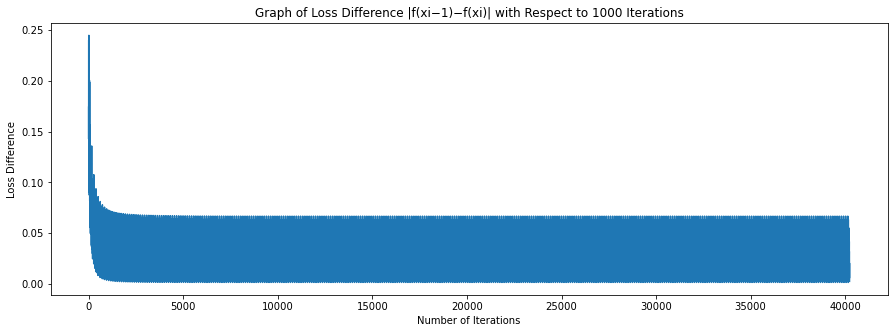

In [23]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(loss_difference_values))],loss_difference_values)
ax.set_title('Graph of Loss Difference |f(xi−1)−f(xi)| with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss Difference')

###### Graph of Log Loss

Text(0, 0.5, 'Loglikelihood Loss')

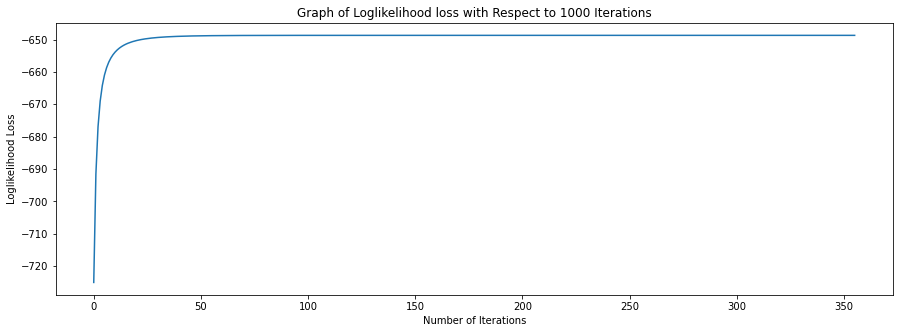

In [24]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(logloss_values))],logloss_values)
ax.set_title('Graph of Loglikelihood loss with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loglikelihood Loss')

#### Keeping the hyperparameters of learning rate and batch size fixed (good guesses) and iteratively doing backward selection keeping track of the AIC metric.

##### Function to calculate the AIC metric for the given Dataset

In [25]:
def AIC(X,Y,B,P):
    # AIC = -2logL + 2P
    return (-2 * loglikelihood_loss(X,Y,B)) + (2 * P)

##### Function to perform Backward Search for Selecting Features which gives minimum AIC

In [26]:
def backward_search(X_train,Y_train,X_test,Y_test):
    #Initializing an array containing all the columns of training dataset
    V_used = np.array([i for i in range(len(X[0]))])
    
    #Iterate until we see some improvement in our AIC metric
    improvement = True
    while improvement:
        #Calculating beta using all features in V_used
        beta_used = learn_logreg_mini_GA(X_train[:,V_used],Y_train,X_test[:,V_used],Y_test,10,10**-10)
        
        #variable to store best gain/improvement
        gain_best = AIC(X_train[:,V_used],Y_train,beta_used,len(V_used))
        
        #Initializing variable to store feature which have to be removed after following iteration
        v_best = None
        
        #Iterating over all the features in our dataset
        for v in V_used:
            #Removing selected feature from the V_used array
            V_used_v = np.delete(V_used,np.where(V_used == v)[0][0])
            
            #Calculating beta using all features in V_used except selected feature v
            beta_used_v = learn_logreg_mini_GA(X_train[:,V_used_v],Y_train,X_test[:,V_used_v],Y_test,10,10**-10)
            
            #Calculating the AIC after removing that specific feature from V_used
            gain = AIC(X_train[:,V_used_v],Y_train,beta_used_v,len(V_used_v))
            
            #Checking if our new calculated gain is better then our best gain, if so replacing it with our new gain
            if gain < gain_best:
                gain_best = gain
                v_best = v
                
        #Setting improvement to True if our gain is greater than 0
        improvement = v_best != None
        
        #If there is a improvement in our model than removing that feature from our V_used array
        if improvement:
            print('Removing the feature with Index: {}'.format(v_best))
            
            print('AIC before removing the feature: {}'.format(
                AIC(X_train[:,V_used],Y_train,learn_logreg_mini_GA(X_train[:,V_used],Y_train,X_test[:,V_used],Y_test,10,10**-10),len(V_used))))
            
            #Removing the Feature which is decreasing our Model AIC
            V_used = np.delete(V_used,np.where(V_used == v_best)[0][0]).astype(int)
            
            print('AIC after removing the feature: {}\n'.format(
                AIC(X_train[:,V_used],Y_train,learn_logreg_mini_GA(X_train[:,V_used],Y_train,X_test[:,V_used],Y_test,10,10**-10),len(V_used))))
    
    #Returning the final selected features for our model
    return V_used

In [27]:
features_selected = backward_search(X_train,Y_train,X_test,Y_test)

Removing the feature with Index: 49
AIC before removing the feature: 5288.76762831439
AIC after removing the feature: 5286.60669811648

Removing the feature with Index: 6
AIC before removing the feature: 5286.60669811648
AIC after removing the feature: 5284.514358696731

Removing the feature with Index: 22
AIC before removing the feature: 5284.514358696731
AIC after removing the feature: 5282.429053890035

Removing the feature with Index: 1
AIC before removing the feature: 5282.429053890035
AIC after removing the feature: 5280.343487170187

Removing the feature with Index: 36
AIC before removing the feature: 5280.343487170187
AIC after removing the feature: 5278.291321333864

Removing the feature with Index: 9
AIC before removing the feature: 5278.291321333864
AIC after removing the feature: 5276.253219127696

Removing the feature with Index: 5
AIC before removing the feature: 5276.253219127696
AIC after removing the feature: 5274.222564724467

Removing the feature with Index: 27
AIC b

#### Printing the selected Features

In [28]:
df_columns = np.array(bank_df_encoded.columns)
print('Features selected after Backward Search: \n{}'.format(df_columns[features_selected]))

Features selected after Backward Search: 
['age' 'campaign' 'education_tertiary' 'contact_unknown' 'month_mar'
 'month_oct' 'poutcome_success']


#### Calculating new Beta values using Mini batch gradient ascent function with selected Features and 1000 iterations

In [29]:
beta = learn_logreg_mini_GA(X_train[:,features_selected],Y_train,X_test[:,features_selected],Y_test,1000,10**-10)

#### Reporting the final error on Test set.

###### Graph of Loss Difference

Text(0, 0.5, 'Loss Difference')

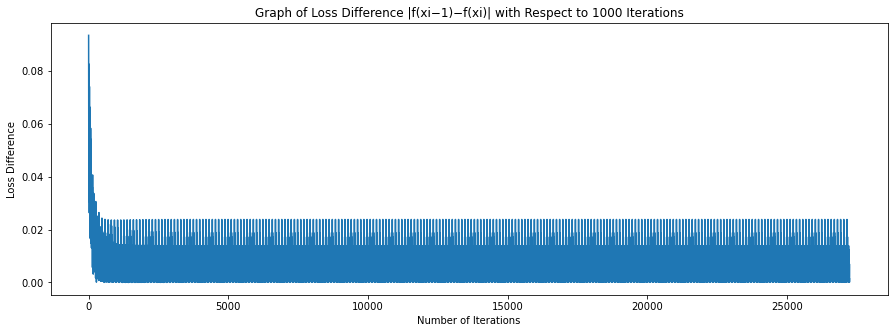

In [30]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(loss_difference_values))],loss_difference_values)
ax.set_title('Graph of Loss Difference |f(xi−1)−f(xi)| with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss Difference')

###### Graph of Loglikelihood Loss

Text(0, 0.5, 'Loglikelihood Loss')

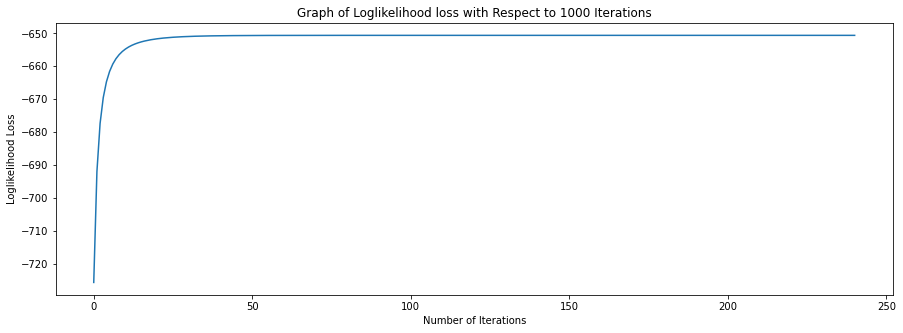

In [31]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(logloss_values))],logloss_values)
ax.set_title('Graph of Loglikelihood loss with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loglikelihood Loss')

### Exercise 2: Regularization for Logistic Regression

#### Selecting only that features that gave us Minimum AIC in Backward Selection

In [32]:
#X Contain all the data points except the label column
X = X[:,features_selected]

#### Picking a range of α0 and λ defined on grid. And choosing fixed batchsize = 50

In [33]:
#Initializing different values of Alpha's α
alphas = [0.01,0.001,0.0001,0.00001,0.000001]

#Initializing different values of Lambda's λ
lamdas = [np.exp(-10),np.exp(-11),np.exp(-12),np.exp(-13),np.exp(-14)]

#Choosing the Batch Size for Mini Batch Gradient Ascent
batch_size = 50

#Setting the value of K for K-fold Cross Validation
K = 5

#### Implementing k-fold cross-validation protocol for grid search. For each combination of α0 and λ, performing k-fold cross-validation. Letting k = 5 in this case.

##### Function which returns the gradient of Loss function with Regularization term 

In [34]:
def dL_with_regularization(X,Y,B,lamda):
    # Derivative of Loss = X^T * (Y - Y_pred) - 2λB
    return (X.T @ (np.subtract(Y,sigmoid_function(X @ B)))) - (2 * lamda * B)

##### Function to calculate the loglikelihood loss with regularization term

In [35]:
def loglikelihood_loss_regularized(X,Y,B,lamda):
    # L = summation((Y - Y_pred) - log(1 + e^Y_pred)) - λ|B|^2
    return np.sum((Y * sigmoid_function(X @ B)) - np.log(1 + np.exp(sigmoid_function(X @ B)))) - (lamda * np.sum(np.square(B)))

##### Function to calculate the loss difference with regularized loglikelihood

In [36]:
def loss_difference_regularized(X,Y,B_old,B_new,lamda):
    # |L(B_old) - L(B_new)|
    return np.abs(loglikelihood_loss_regularized(X,Y,B_old,lamda) - loglikelihood_loss_regularized(X,Y,B_new,lamda))

##### Function to predict the class of Y based on the probability computed using Logistic Regression

In [37]:
def predict_y_beta(X,B):
    #Computing Y probabilities based on X matrix and calculated Beta
    y = (X @ B).reshape(1,-1)[0]
    
    #For each predicted y, calculating its class which it belongs to
    for i in range(len(y)):
        #If y is greater than or equal to 0.5, then its class is 1 otherwise the class is predicted to be 0
        y[i] = 1 if y[i] >= 0.5 else 0
    
    #Returning the Classes of each Y predicted
    return y.reshape(-1,1)

##### Function to Calculate the Risk Estimation/Accuracy of the given Model based on how it has performed on the given dataset

In [38]:
def risk_estimator(y_pred,y):
    #Calculating how many correct prediction our model has predicted as compared to actual Y
    correct = sum(y1 == y2 for y1, y2 in zip(y_pred.reshape(1,-1)[0],y.reshape(1,-1)[0]))
    
    #Returning the percentage of corrent prediction based on total prediction
    return correct/len(y_pred)

##### Function to split our dataset into k folds based on K-fold Cross Validation Technique

In [39]:
def cross_validation_split(X,Y,k,K):
    #Checking if the given k is larger than the allowed K partitions
    if k >= K:
        raise Exception('The Requested k-Fold should not be Greater than total Folds K')
    
    #Calculating the Test set size based on dataset size and total partitions given
    set_size = int(len(X)/K)
    
    #Splitting the Dataset into Training and Testing sets based on set size.The size of test set is equal to the 
    #set size calculated above and all the remaining data points after removing test set, are allocated into the training set.
    X_train = np.delete(X,[i for i in range(k*set_size,(k*set_size)+set_size)],axis=0)
    X_test = X[k*set_size:(k*set_size)+set_size,:]
    Y_train = np.delete(Y,[i for i in range(k*set_size,(k*set_size)+set_size)],axis=0)
    Y_test = Y[k*set_size:(k*set_size)+set_size,:]
    
    #Returning the created Training and Test datasets.
    return X_train, Y_train, X_test, Y_test

##### Function to Maximize the Mini batch Gradient Ascent based on Total Iterations and Learning Rate with added Regularization cost

In [40]:
def learn_logreg_with_regularization(X_train,Y_train,X_test,Y_test,imax,epsilon,mu,lamda):
    #Using global arrays to store loss difference and Log loss values for different Iterations
    global loss_difference_values , logloss_values
    
    #Emptying both Loss difference and Log loss arrays
    loss_difference_values , logloss_values = np.array([]) , np.array([])
    
    #Initializing beta vector with zeros
    beta = np.zeros(shape=(len(X_train[0]),1))
    
    for i in range(imax):
        #Creating Mini batches to run mini batch gradient ascent
        mini_batches = create_mini_batches(X_train,Y_train,batch_size)
        
        #Making a Copy of beta value for calculating loss afterwards 
        old_beta = np.copy(beta)
        
        for mini_X, mini_Y in mini_batches:
            
            #Calculating new Beta values from previous beta values and gradient ascent direction and Regularization cost
            #Beta = Beta + learning_rate * gradient ascent based on Beta and Regularization term
            beta_ = beta + (mu * dL_with_regularization(mini_X,mini_Y,beta,lamda))

            #Appending Loss difference between between previous and new Beta
            loss_difference_values = np.append(loss_difference_values,loss_difference_regularized(mini_X,mini_Y,beta,beta_,lamda))
            
            #Copying new Beta value to old Beta value for Further Calculation
            beta = np.copy(beta_)

        #Appending RMSE loss between actual Y and Predicted Y
        logloss_values = np.append(logloss_values,loglikelihood_loss_regularized(X_test,Y_test,beta_,lamda))
        
        #Checking the Stopping Condition by comparing loss on previous and current beta
        if loglikelihood_loss_regularized(X_train,Y_train,beta_,lamda) - loglikelihood_loss_regularized(X_train,Y_train,old_beta,lamda) < epsilon:
            return beta_
    
    #Returning the Optimal Beta vector
    return beta_

#### Keeping track of mean performance (i.e. Classification Accuracy value) across k − folds for each set of hyperparameters.

In [41]:
#Initializing a matrix to store the classification accuracy of each pair of λ and α
risk_estimation = np.zeros(shape=(len(alphas),len(lamdas)))

In [42]:
print('Calculating Risk Estimation/Accuary for different Combination of λ and α\n')
#Iterating through all combination of λ and α our K-fold cross validation dataset
for i,alpha in enumerate(alphas):
    for j,lamda in enumerate(lamdas):
        #Initializing the risk to 0 before start of applying k-fold cross validation splitting
        risk = 0
        for k in range(K):
            #Splitting our dataset on the basis of K-fold cross validation on different values of k
            X_train, Y_train, X_test, Y_test = cross_validation_split(X,Y.reshape(-1,1),k,K)
            
            #Calculating beta based on Regularization and K-fold Cross Validation
            beta = learn_logreg_with_regularization(X_train,Y_train,X_test,Y_test,1000,10**-10,alpha,lamda)
            
            #Calculating the Risk Estimation/Accuracy on Test set and adding it to our total Risk
            risk += risk_estimator(predict_y_beta(X_test,beta),Y_test)
            
        #Saving the Mean Risk/Accuracy of the specific λ and α pair in our matrix
        risk_estimation[i][j] = (risk/K)
        print('Acurracy of Model with Alpha: {}, and Lambda: {} is: {:.2f}%'.format(alpha,lamda,((risk/K)*100)))

Calculating Risk Estimation/Accuary for different Combination of λ and α

Acurracy of Model with Alpha: 0.01, and Lambda: 4.5399929762484854e-05 is: 89.14%
Acurracy of Model with Alpha: 0.01, and Lambda: 1.670170079024566e-05 is: 89.14%
Acurracy of Model with Alpha: 0.01, and Lambda: 6.14421235332821e-06 is: 89.14%
Acurracy of Model with Alpha: 0.01, and Lambda: 2.2603294069810542e-06 is: 89.14%
Acurracy of Model with Alpha: 0.01, and Lambda: 8.315287191035679e-07 is: 89.14%
Acurracy of Model with Alpha: 0.001, and Lambda: 4.5399929762484854e-05 is: 89.38%
Acurracy of Model with Alpha: 0.001, and Lambda: 1.670170079024566e-05 is: 89.40%
Acurracy of Model with Alpha: 0.001, and Lambda: 6.14421235332821e-06 is: 89.40%
Acurracy of Model with Alpha: 0.001, and Lambda: 2.2603294069810542e-06 is: 89.40%
Acurracy of Model with Alpha: 0.001, and Lambda: 8.315287191035679e-07 is: 89.40%
Acurracy of Model with Alpha: 0.0001, and Lambda: 4.5399929762484854e-05 is: 89.42%
Acurracy of Model with Al

#### Plotting on the grid α0 vs λ the Classification Accuracy score for all combinations

Text(0.5, 0, 'Risk Esitmation/Accuracy')

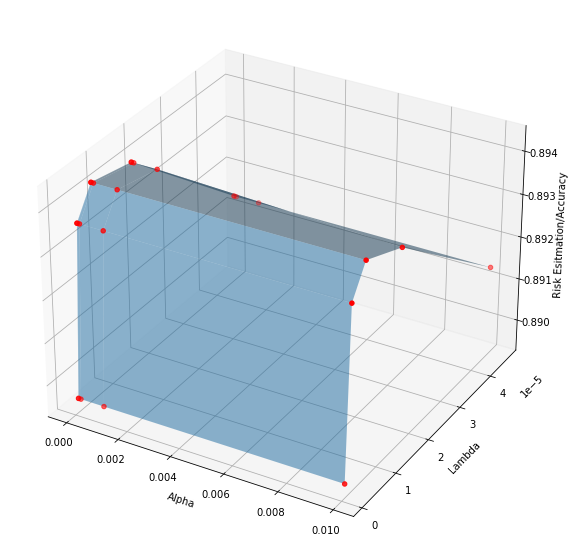

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
X_mesh, Y_mesh = np.meshgrid(alphas,lamdas)
ax.plot_surface(X_mesh, Y_mesh, risk_estimation,alpha=0.5)
ax.scatter3D(X_mesh, Y_mesh, risk_estimation,c='r')
ax.set_xlabel('Alpha')
ax.set_ylabel('Lambda')
ax.set_zlabel('Risk Esitmation/Accuracy')

#### Finally, for the optimal value of alpha0 and λ, training our model on complete training data and evaluate on Test data. Report one single Accuracy and Log-likelihood for Test data.

###### Calculating Beta using Mini batch Gradient Ascent, With Regularization and α = 0.0001 and λ = 0.01

In [44]:
beta = learn_logreg_with_regularization(X_train,Y_train,X_test,Y_test,1000,10**-10,0.0001,np.exp(-10))

In [45]:
print('The Accuracy of the Model after Regularization and Hyperparameter Optimization is: {:.2f}%'.format(risk_estimator(predict_y_beta(X_test,beta),Y_test)*100))

The Accuracy of the Model after Regularization and Hyperparameter Optimization is: 89.27%


In [46]:
print('The Loglikelihood of the Model after Regularization and Hyperparameter Optimization is: {}'.format(loglikelihood_loss(X_test,Y_test,beta)))

The Loglikelihood of the Model after Regularization and Hyperparameter Optimization is: -649.9843472997734


### Exercise 3: Implementing Hyperband for Logistic Regression

##### Splitting the Dataset into Train, Validation and Test Splits according to Ratio: 70% : 15% : 15%

In [47]:
#Calculating number of rows to be copied in the Training Set according to specific ratio
total_training_rows = int(len(X)*0.7)

#Calculating number of rows to be copied in the Validating Set according to specific ratio
total_validation_rows = int(len(X)*0.15)

In [48]:
#Splitting the Dataset into Training set based on calculated rows
X_train, Y_train = X[:total_training_rows,:], Y[:total_training_rows].reshape(-1,1)

In [49]:
#Splitting the Dataset into Validating set based on calculated rows
X_Validation, Y_Validation = X[total_training_rows:total_training_rows+total_validation_rows,:], Y[total_training_rows:total_training_rows+total_validation_rows].reshape(-1,1)

In [50]:
#Splitting the Dataset into Test set based on calculated rows
X_test, Y_test = X[total_training_rows+total_validation_rows:,:], Y[total_training_rows+total_validation_rows:].reshape(-1,1)

##### Implementing a state-of-the-art Hyperparameter Optimization algorithm (Hyperband) for tuning the hyperparameters α0, λ, stepsize-controller and batch_size for the logistic regression model above

In [51]:
def hyperband(X_train, Y_train, X_Validation, Y_Validation, max_iter, eta):
    logeta = lambda x : np.log(x)/np.log(eta)
    
    #Number of unique epochs of Successive Halving
    s_max = int(logeta(max_iter))
    
    #Total number of iterations per epoch of Succesive Halving (n,r)
    B = (s_max + 1) * max_iter
    
    #Iterating over all Epochs
    for s in reversed(range(s_max + 1)):
        #Initial number of configurations
        n = int(math.ceil(int(B/max_iter/(s+1))*eta**s))
        
        #Initial number of iterations for each configurations
        r = max_iter*eta**(-s)
        
        #Creating the stack for all hyperparameters
        lambdas = np.arange(np.exp(-10),np.exp(-15),(np.exp(-15) - np.exp(-10))/n)
        alphas = np.arange(0.1,0.00001,(0.00001 - 0.1)/n)
        batch_sizes = np.random.randint(30,100,size=n,dtype=int)
        T = np.vstack([lambdas,alphas,batch_sizes]).T
        
        for i in range(s+1):
            n_i = n*eta**(-i)
            r_i = r*eta**i
            val_losses = []
            
            #Calculating loss for each hyperparameter
            for t in T:
                batch_size = int(t[2])
                beta = learn_logreg_with_regularization(X_train,Y_train,X_test,Y_test,int(r_i),10**-10,t[1],t[0])
                val_losses.append([loglikelihood_loss(X_train,Y_train,beta)])
            
            #Appending the loss for each hyperparameter Configuration
            T = np.append(T,val_losses,axis=1)
            
            #Sorting the Hyperparameter configuration list based of loss value
            T = T[T[:, -1].argsort()]
        
    #Returning the hyperparameter configuration with the least Loss
    return T[0]

##### Calculating the set of Hyperparameters which will give optimal results using Hyperband Algorithm

In [52]:
# maximum iterations per configuration
max_iter = 81

# defining downsampling rate
eta = 3
optimal_parameters = hyperband(X_train,Y_train,X_Validation,Y_Validation,max_iter,eta)

##### Again resplitting the X matrix and Y vector into Training

In [53]:
#Calculating number of rows to be copied in the Training Set according to specific ratio
total_training_rows = int(len(X)*0.85)

In [54]:
#Splitting the Dataset into Training set based on calculated rows
X_train, Y_train = X[:total_training_rows,:], Y[:total_training_rows].reshape(-1,1)

##### Training and Testing the model with the new Optimal values of Hyperparameters

In [55]:
#Extracting the hyperparameters values from the output list of hyperband algorithm
batch_size = int(optimal_parameters[2])
alpha_new = optimal_parameters[1]
lambda_new = optimal_parameters[0]

In [56]:
beta = learn_logreg_with_regularization(X_train,Y_train,X_test,Y_test,1000,10**-10,alpha_new,lambda_new)

##### Reporting the final error on Test set after training using optimal Hyperparameters

###### Graph of Loss Difference

Text(0, 0.5, 'Loss Difference')

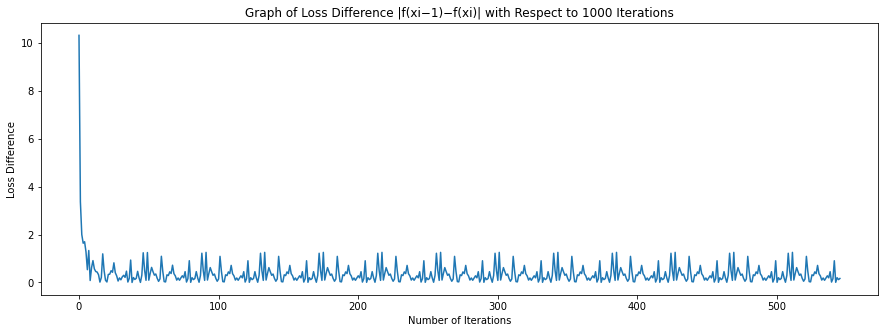

In [57]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(loss_difference_values))],loss_difference_values)
ax.set_title('Graph of Loss Difference |f(xi−1)−f(xi)| with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss Difference')

###### Graph of Loglikelihood Loss

Text(0, 0.5, 'Loglikelihood Loss')

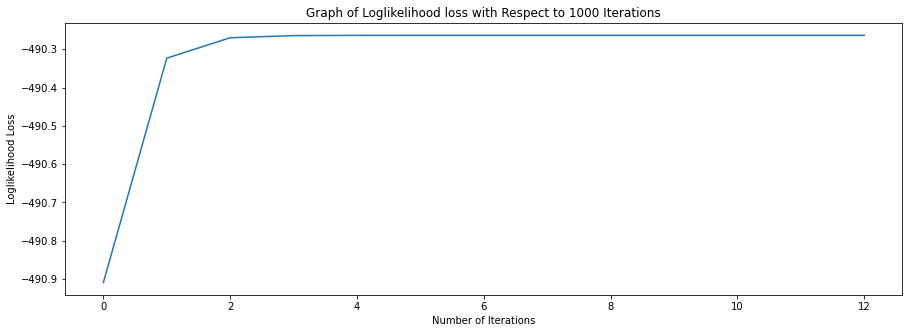

In [58]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(logloss_values))],logloss_values)
ax.set_title('Graph of Loglikelihood loss with Respect to 1000 Iterations')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loglikelihood Loss')

In [59]:
print('The Accuracy of the Model after Regularization and Hyperparameter Optimization (Hyperband) is: {:.2f}%'
      .format(risk_estimator(predict_y_beta(X_test,beta),Y_test)*100))

The Accuracy of the Model after Regularization and Hyperparameter Optimization (Hyperband) is: 88.95%


In [60]:
print('The Loglikelihood of the Model after Regularization and Hyperparameter Optimization (Hperband) is: {}'
      .format(loglikelihood_loss(X_test,Y_test,beta)))

The Loglikelihood of the Model after Regularization and Hyperparameter Optimization (Hperband) is: -490.26365578865784
